In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Outlier
from scipy import stats

# Standardization of Numeric Data
from sklearn.preprocessing import StandardScaler

# K-Means & K-Medoids
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids

# Check Score
from sklearn.metrics import silhouette_score

## Data Understanding

In [2]:
df = pd.read_csv('dataset/clustering_data.csv')
df.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,G28036,Bogor,Internet Banking,< 1 Tahun,69.0,Laki-laki,Menikah,3,Doktor,1,0,0,0,0,0,1,747,44607
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
3,G04482,Bandung,Cabang,< 1 Tahun,45.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,431,417250579
4,G07807,Bandung,Aplikasi Digital,< 1 Tahun,34.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,184,453573593


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28129 entries, 0 to 28128
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   GCIF                        28129 non-null  object 
 1   Area                        28129 non-null  object 
 2   Jalur_Pembukaan             28129 non-null  object 
 3   Vintage                     28129 non-null  object 
 4   Usia                        24084 non-null  float64
 5   Jenis_Kelamin               28129 non-null  object 
 6   Status_Perkawinan           28129 non-null  object 
 7   Jumlah_Anak                 28129 non-null  int64  
 8   Pendidikan                  28129 non-null  object 
 9   Produk_Tabungan             28129 non-null  int64  
 10  Produk_Deposito             28129 non-null  int64  
 11  Produk_Kartu_Kredit         28129 non-null  int64  
 12  Produk_Kredit_Rumah         28129 non-null  int64  
 13  Produk_Kredit_Kendaraan     281

### Explore

#### By Vintage

In [4]:
Customer_By_Vintage = pd.DataFrame(df.groupby('Vintage')['GCIF'].count())
Customer_By_Vintage

,GCIF
Vintage,
2 - 3 Tahun,13953
< 1 Tahun,9278
> 4 Tahun,4898


In [5]:
num_cols = df.select_dtypes(include=['number']).columns
range_vintage = pd.DataFrame(df.groupby('Vintage').agg({
                             'GCIF': 'count', 
                            **{col: 'mean' for col in num_cols}
                              }))
range_vintage

,GCIF,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Vintage,,,,,,,,,,,,
2 - 3 Tahun,13953,42.578850,1.291694,0.927256,0.607755,0.328531,0.589336,0.163764,0.539311,3.155952,407.679639,2.489367e+08
< 1 Tahun,9278,42.689341,1.294676,0.931235,0.592585,0.336495,0.594201,0.164798,0.523389,3.142703,395.611231,2.486679e+08
> 4 Tahun,4898,42.571866,1.338301,0.912822,0.613107,0.338914,0.592691,0.163536,0.560637,3.181707,422.593508,2.500646e+08


Vintage : Nasabah yang sudah bergabung (range waktu)
1. Rata-rata nasabah bergabung selama 2-3 tahun. 
2. Nasabah yang sudah bergabung (vintage) < 1 tahun, 2-3 tahun dan > 4 tahun memiliki rata-rata usia yang sama, yaitu 42 tahun.
3. Nasabah yang sudah bergabung rata-rata sudah memiliki produk_tabungan (+-92% memiliki).
4. Rata-rata nasabah di semua vintage memiliki total_kepemilikan_produk sebanyak 3 produk.
5. Pendapatan_tahunan dari setiap nasabah tidak jauh dari 400 dollar. Jika dilihat polanya, semakin tinggi vintage nasabah, semakin besar pendapatan_tahunan yang nasabah tersebut punya.
6. Total Asset Nasabah dalam Cutoff Bulan Observasi setiap vintagenya memiliki total yang sama, yaitu +- 2,48.

#### By Area

In [6]:
Area_Customer = pd.DataFrame(df.groupby('Area').agg({
                            'GCIF' :'count',
                            **{col: 'mean' for col in num_cols}
}))
Area_Customer.sort_values('GCIF', ascending=False)

,GCIF,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Area,,,,,,,,,,,,
Jakarta,7017,42.696995,1.322930,0.925467,0.603534,0.336184,0.590708,0.169873,0.540829,3.166595,406.478552,2.485876e+08
Bandung,6917,42.562310,1.296516,0.925401,0.599682,0.329767,0.587393,0.163076,0.537516,3.142836,405.124910,2.454722e+08
Surabaya,5002,42.768980,1.284486,0.927629,0.608357,0.329668,0.585566,0.168533,0.528589,3.148341,409.074370,2.523277e+08
Solo,5001,42.445452,1.270746,0.922416,0.603479,0.337932,0.604679,0.156969,0.540492,3.165967,408.010198,2.507478e+08
Jogja,3001,42.512422,1.309897,0.934355,0.608464,0.333555,0.594469,0.158614,0.535155,3.164612,402.694768,2.496616e+08
Bogor,1191,42.660451,1.366919,0.921075,0.596977,0.324097,0.582704,0.160369,0.554996,3.140218,402.227540,2.499853e+08


1. Customer terbanyak ada di Jakarta dan Surabaya dengan selisih 100 customer. 
2. Tiap area memiliki Usia yang rata-rata sama, yaitu 42 tahun.
3. Tiap area rata-rata tidak memiliki produk kartu kredit,produk kredit rumah, produk kredit kendaraan. Total kepemilikan produk rata-rata hanya 3 tiap area.
4. Pendapatan tahunan tiap area memiliki rata-rata rentan 402-409 Dollar.

#### By Jalur Pembukaan

In [7]:
Opening_Path = pd.DataFrame(df.groupby('Jalur_Pembukaan').agg({
                            'GCIF' :'count',
                            **{col: 'mean' for col in num_cols}
}))
Opening_Path.sort_values('GCIF', ascending=False)

,GCIF,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Jalur_Pembukaan,,,,,,,,,,,,
Telemarketing,10262,42.676514,1.300526,0.923309,0.606412,0.334730,0.590821,0.165952,0.538589,3.159813,404.674527,2.494725e+08
Aplikasi Digital,6216,42.442089,1.292149,0.930180,0.598456,0.323681,0.593147,0.165541,0.535714,3.146718,405.278314,2.489950e+08
Cabang,5856,42.560627,1.308743,0.924180,0.610143,0.325478,0.583675,0.153518,0.544740,3.141735,409.923156,2.456661e+08
Internet Banking,5795,42.723992,1.302502,0.928387,0.597929,0.347368,0.598965,0.169802,0.531493,3.173943,406.593270,2.517532e+08


Customer yang melakukan pembukaan melalui telemarketing lebih banyak dibandingkan yang lainnya.

## Data Preparation

### Pengecekan Data Duplikat dan Missing Value

In [8]:
df.isna().sum()

GCIF                             0
Area                             0
Jalur_Pembukaan                  0
Vintage                          0
Usia                          4045
Jenis_Kelamin                    0
Status_Perkawinan                0
Jumlah_Anak                      0
Pendidikan                       0
Produk_Tabungan                  0
Produk_Deposito                  0
Produk_Kartu_Kredit              0
Produk_Kredit_Rumah              0
Produk_Kredit_Kendaraan          0
Produk_Kredit_Dana_Tunai         0
Total_Kepemilikan_Produk         0
Pendapatan_Tahunan               0
Total_Relationship_Balance       0
dtype: int64

In [9]:
mean_usia_by_pendidikan = df.groupby('Pendidikan')['Usia'].mean()
mean_usia_by_pendidikan

Pendidikan
Doktor                  41.941468
Magister                42.659112
SD                      42.842732
SMA                     42.808137
SMP                     42.837314
Sarjana                 42.458725
Tidak Sekolah Formal    42.607689
Name: Usia, dtype: float64

Usianya rata-rata 42 tahun. Kita fillna dengan data tersebut.

In [10]:
df['Usia'] = df['Usia'].fillna(df['Pendidikan'].map(mean_usia_by_pendidikan))

In [11]:
df.isna().sum()

GCIF                          0
Area                          0
Jalur_Pembukaan               0
Vintage                       0
Usia                          0
Jenis_Kelamin                 0
Status_Perkawinan             0
Jumlah_Anak                   0
Pendidikan                    0
Produk_Tabungan               0
Produk_Deposito               0
Produk_Kartu_Kredit           0
Produk_Kredit_Rumah           0
Produk_Kredit_Kendaraan       0
Produk_Kredit_Dana_Tunai      0
Total_Kepemilikan_Produk      0
Pendapatan_Tahunan            0
Total_Relationship_Balance    0
dtype: int64

In [12]:
df.duplicated().sum()

0

### Pengecekan Outlier

In [13]:
df.describe()

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
count,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,28129.000000,2.812900e+04
mean,42.610420,1.300793,0.926055,0.603683,0.332966,0.591525,0.164066,0.537772,3.156067,406.295922,2.490444e+08
std,11.431469,1.442242,0.261686,0.489140,0.471283,0.491561,0.370342,0.498580,1.059098,180.272928,1.582262e+08
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,80.000000,1.028000e+03
25%,33.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,282.000000,1.210965e+08
50%,42.808137,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,3.000000,392.000000,2.411094e+08
75%,51.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,4.000000,498.000000,3.592035e+08
max,70.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,900.000000,8.979315e+08


In [14]:
z_scores = stats.zscore(df[['Usia', 'Pendapatan_Tahunan', 'Total_Relationship_Balance']])
df = df[(z_scores < 3).all(axis=1)]

In [15]:
df.count()

GCIF                          27698
Area                          27698
Jalur_Pembukaan               27698
Vintage                       27698
Usia                          27698
Jenis_Kelamin                 27698
Status_Perkawinan             27698
Jumlah_Anak                   27698
Pendidikan                    27698
Produk_Tabungan               27698
Produk_Deposito               27698
Produk_Kartu_Kredit           27698
Produk_Kredit_Rumah           27698
Produk_Kredit_Kendaraan       27698
Produk_Kredit_Dana_Tunai      27698
Total_Kepemilikan_Produk      27698
Pendapatan_Tahunan            27698
Total_Relationship_Balance    27698
dtype: int64

Berkurang lumayan banyak, dari 28.129 menjadi 27698

### Filtering Data Telemarketing Only (Data Terbanyak)

In [16]:
df_tele = df[df.Jalur_Pembukaan == 'Telemarketing']
df_tele.head()

,GCIF,Area,Jalur_Pembukaan,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
1,G18528,Jakarta,Telemarketing,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
2,G22419,Surabaya,Telemarketing,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
7,G13193,Solo,Telemarketing,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
8,G09296,Jakarta,Telemarketing,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
9,G09228,Jakarta,Telemarketing,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562


#### Drop Column GCIF (ID), dan Jalur_Pembukaan (Label)

In [17]:
df_tele = df_tele.drop(columns=['GCIF', 'Jalur_Pembukaan']).reset_index(drop=True)

In [18]:
df_tele.head()

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,Jakarta,< 1 Tahun,23.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,198,10668586
1,Surabaya,< 1 Tahun,30.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,280,299076075
2,Solo,< 1 Tahun,29.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,295,76653088
3,Jakarta,< 1 Tahun,49.0,Laki-laki,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,443,247157199
4,Jakarta,< 1 Tahun,21.0,Perempuan,Belum Menikah,0,Doktor,1,0,0,0,0,0,1,257,27585562


## Pembagian Experiment
1. Exp 0: Semua Var digunakan
2. Exp 1: Menggunakan Demographics
3. Exp 3: Menggunakan Financial Related Variable

In [19]:
df_tele1 = df_tele.iloc[:,0:7]
df_tele1

,Area,Vintage,Usia,Jenis_Kelamin,Status_Perkawinan,Jumlah_Anak,Pendidikan
0,Jakarta,< 1 Tahun,23.000000,Laki-laki,Belum Menikah,0,Doktor
1,Surabaya,< 1 Tahun,30.000000,Laki-laki,Belum Menikah,0,Doktor
2,Solo,< 1 Tahun,29.000000,Laki-laki,Belum Menikah,0,Doktor
3,Jakarta,< 1 Tahun,49.000000,Laki-laki,Belum Menikah,0,Doktor
4,Jakarta,< 1 Tahun,21.000000,Perempuan,Belum Menikah,0,Doktor
...,...,...,...,...,...,...,...
10083,Jakarta,2 - 3 Tahun,42.607689,Perempuan,Janda/Duda,3,Tidak Sekolah Formal
10084,Surabaya,2 - 3 Tahun,42.607689,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal
10085,Jakarta,2 - 3 Tahun,42.607689,Laki-laki,Janda/Duda,0,Tidak Sekolah Formal
10086,Solo,2 - 3 Tahun,33.000000,Laki-laki,Menikah,2,Tidak Sekolah Formal


In [20]:
df_tele2 = df_tele.iloc[:,7:16]
df_tele2

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562
...,...,...,...,...,...,...,...,...,...
10083,1,1,0,1,1,1,5,292,301029945
10084,1,1,1,1,0,1,5,95,588719805
10085,1,1,1,0,1,1,5,472,121543656
10086,1,1,1,1,1,1,6,366,146178244


### Melakukan Encoding untuk Data Category

In [21]:
df_tele1 = pd.get_dummies(df_tele1, columns=['Area','Jenis_Kelamin','Status_Perkawinan','Pendidikan','Vintage'])
df_tele1

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Jenis_Kelamin_Perempuan,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.000000,0,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,30.000000,0,False,False,False,False,False,True,True,False,...,True,False,False,False,False,False,False,False,True,False
2,29.000000,0,False,False,False,False,True,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,49.000000,0,False,False,True,False,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
4,21.000000,0,False,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,42.607689,3,False,False,True,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
10084,42.607689,0,False,False,False,False,False,True,True,False,...,False,False,False,False,False,False,True,True,False,False
10085,42.607689,0,False,False,True,False,False,False,True,False,...,False,False,False,False,False,False,True,True,False,False
10086,33.000000,2,False,False,False,False,True,False,True,False,...,False,False,False,False,False,False,True,True,False,False


### Standardisasi Data Numerik

In [22]:
predname = df_tele2.columns

In [23]:
pt = StandardScaler()

In [24]:
x_num = pd.DataFrame(pt.fit_transform(df_tele2))

In [25]:
x_num.columns = predname

In [26]:
x_num.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-1.153786,-1.607110
1,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.696581,0.412559
2,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.612945,-1.145031
3,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,0.212255,0.048980
4,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.824821,-1.488643


### Pengecekan Korelasi

In [27]:
corr1 = df_tele1.corr().abs()
corr2 = df_tele2.corr().abs()

In [28]:
# Membuang nilai redundan pada Matriks
upper1 = corr1.where(np.triu(np.ones(corr1.shape), k=1).astype(np.bool_))
upper2 = corr2.where(np.triu(np.ones(corr2.shape), k=1).astype(np.bool_))

# Mencari Nilai yang berkorelasi diatas 0.7 dan menghapusnya
drop1 = [col for col in upper1.columns if any(upper1[col]>0.7)]
drop2 = [col for col in upper2.columns if any(upper2[col]>0.7)]

# Menghapus Col yang berkorelasi di atas 0.7
df_tele1 = df_tele1.drop(drop1, axis=1)
df_tele2 = df_tele2.drop(drop2, axis=1)

In [29]:
df_tele1.head()

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,...,Pendidikan_Doktor,Pendidikan_Magister,Pendidikan_SD,Pendidikan_SMA,Pendidikan_SMP,Pendidikan_Sarjana,Pendidikan_Tidak Sekolah Formal,Vintage_2 - 3 Tahun,Vintage_< 1 Tahun,Vintage_> 4 Tahun
0,23.0,0,False,False,True,False,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
1,30.0,0,False,False,False,False,False,True,True,True,...,True,False,False,False,False,False,False,False,True,False
2,29.0,0,False,False,False,False,True,False,True,True,...,True,False,False,False,False,False,False,False,True,False
3,49.0,0,False,False,True,False,False,False,True,True,...,True,False,False,False,False,False,False,False,True,False
4,21.0,0,False,False,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False


In [30]:
df_tele2.head()

,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,1,0,0,0,0,0,1,198,10668586
1,1,0,0,0,0,0,1,280,299076075
2,1,0,0,0,0,0,1,295,76653088
3,1,0,0,0,0,0,1,443,247157199
4,1,0,0,0,0,0,1,257,27585562


### Combine df_tele1 and x_num

In [31]:
df_combined = pd.concat([df_tele1, x_num], axis=1, join='inner')
df_combined

,Usia,Jumlah_Anak,Area_Bandung,Area_Bogor,Area_Jakarta,Area_Jogja,Area_Solo,Area_Surabaya,Jenis_Kelamin_Laki-laki,Status_Perkawinan_Belum Menikah,...,Vintage_> 4 Tahun,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
0,23.000000,0,False,False,True,False,False,False,True,True,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-1.153786,-1.607110
1,30.000000,0,False,False,False,False,False,True,True,True,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.696581,0.412559
2,29.000000,0,False,False,False,False,True,False,True,True,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.612945,-1.145031
3,49.000000,0,False,False,True,False,False,False,True,True,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,0.212255,0.048980
4,21.000000,0,False,False,True,False,False,False,False,True,...,False,0.290284,-1.226314,-0.695833,-1.186923,-0.436262,-1.067287,-2.052077,-0.824821,-1.488643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10083,42.607689,3,False,False,True,False,False,False,False,False,...,False,0.290284,0.815452,-0.695833,0.842514,2.292201,0.936955,1.808135,-0.629672,0.426242
10084,42.607689,0,False,False,False,False,False,True,True,False,...,False,0.290284,0.815452,1.437125,0.842514,-0.436262,0.936955,1.808135,-1.728081,2.440885
10085,42.607689,0,False,False,True,False,False,False,True,False,...,False,0.290284,0.815452,1.437125,-1.186923,2.292201,0.936955,1.808135,0.373950,-0.830670
10086,33.000000,2,False,False,False,False,True,False,True,False,...,False,0.290284,0.815452,1.437125,0.842514,2.292201,0.936955,2.773188,-0.217072,-0.658158


## Modeling & Evaluation

### K-Means

#### Experiment 0

In [32]:
for n_clusters in range(2,8):
    kmeans=KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels=kmeans.fit_predict(df_combined)
    silhouette_avg=silhouette_score(df_combined, cluster_labels)
    print(f'Silhouette Score (KMeans) - {str(n_clusters)}: {str(silhouette_avg)}')
    df_tele[f'Clustering_KMeans_Exp0_{str(n_clusters)}']=cluster_labels

Silhouette Score (KMeans) - 2: 0.4867373488203023
Silhouette Score (KMeans) - 3: 0.45866445288522784
Silhouette Score (KMeans) - 4: 0.4329272429538982
Silhouette Score (KMeans) - 5: 0.35353144883517595
Silhouette Score (KMeans) - 6: 0.3060849741567244
Silhouette Score (KMeans) - 7: 0.2439709868907784


#### Experiment 1

In [33]:
for n_clusters in range(2,8):
    kmeans=KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels=kmeans.fit_predict(df_tele1)
    silhouette_avg=silhouette_score(df_tele1, cluster_labels)
    print(f'Silhouette Score (KMeans) - {str(n_clusters)}: {str(silhouette_avg)}')
    df_tele[f'Clustering_KMeans_Exp1_{str(n_clusters)}']=cluster_labels

Silhouette Score (KMeans) - 2: 0.5253619660173291
Silhouette Score (KMeans) - 3: 0.5324240122676438
Silhouette Score (KMeans) - 4: 0.4939025702628765
Silhouette Score (KMeans) - 5: 0.4484396615933684
Silhouette Score (KMeans) - 6: 0.4058578603579378
Silhouette Score (KMeans) - 7: 0.35783491023795094


#### Experiment 2

In [34]:
for n_clusters in range(2,8):
    kmeans=KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels=kmeans.fit_predict(x_num)
    silhouette_avg=silhouette_score(x_num, cluster_labels)
    print(f'Silhouette Score (KMeans) - {str(n_clusters)}: {str(silhouette_avg)}')
    df_tele[f'Clustering_KMeans_Exp2_{str(n_clusters)}']=cluster_labels

Silhouette Score (KMeans) - 2: 0.1595524092369682
Silhouette Score (KMeans) - 3: 0.18526810718434097
Silhouette Score (KMeans) - 4: 0.17237141892557203
Silhouette Score (KMeans) - 5: 0.18982012915413457
Silhouette Score (KMeans) - 6: 0.20585893020867305
Silhouette Score (KMeans) - 7: 0.20760359283636054


### K-Medoids

In [35]:
for n_clusters in range(2,8):
    kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels=kmedoids.fit_predict(df_combined)
    silhouette_avg=silhouette_score(df_combined, cluster_labels)
    print(f'Silhouette Score (KMedoids) - {str(n_clusters)}: {str(silhouette_avg)}')
    df_tele[f'Clustering_KMedoids_Exp0_{str(n_clusters)}']=cluster_labels

Silhouette Score (KMedoids) - 2: 0.4575735882017237
Silhouette Score (KMedoids) - 3: 0.4553166083206879
Silhouette Score (KMedoids) - 4: 0.42915702365467795
Silhouette Score (KMedoids) - 5: 0.3437766961604168
Silhouette Score (KMedoids) - 6: 0.26840007867551613
Silhouette Score (KMedoids) - 7: 0.22929691261628646


In [36]:
df_scaled = pt.fit_transform(df_tele1)

In [37]:
for n_clusters in range(2,5):
    kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels=kmedoids.fit_predict(df_scaled)
    silhouette_avg=silhouette_score(df_scaled, cluster_labels)
    print(f'Silhouette Score (KMedoids) - {str(n_clusters)}: {str(silhouette_avg)}')
    df_tele[f'Clustering_KMedoids_Exp1_{str(n_clusters)}']=cluster_labels

Silhouette Score (KMedoids) - 2: 0.03559774790938148
Silhouette Score (KMedoids) - 3: 0.06530563825638476
Silhouette Score (KMedoids) - 4: 0.09144207589724195


In [38]:
for n_clusters in range(2,8):
    kmedoids=KMedoids(n_clusters=n_clusters, random_state=42)
    cluster_labels=kmedoids.fit_predict(x_num)
    silhouette_avg=silhouette_score(x_num, cluster_labels)
    print(f'Silhouette Score (KMedoids) - {str(n_clusters)}: {str(silhouette_avg)}')
    df_tele[f'Clustering_KMedoids_Exp2_{str(n_clusters)}']=cluster_labels

Silhouette Score (KMedoids) - 2: 0.15039867156814643
Silhouette Score (KMedoids) - 3: 0.10211031255818362
Silhouette Score (KMedoids) - 4: 0.09268373855137982
Silhouette Score (KMedoids) - 5: 0.07992488937066845
Silhouette Score (KMedoids) - 6: 0.07542838213233065
Silhouette Score (KMedoids) - 7: 0.09333603943289194


## Hasil

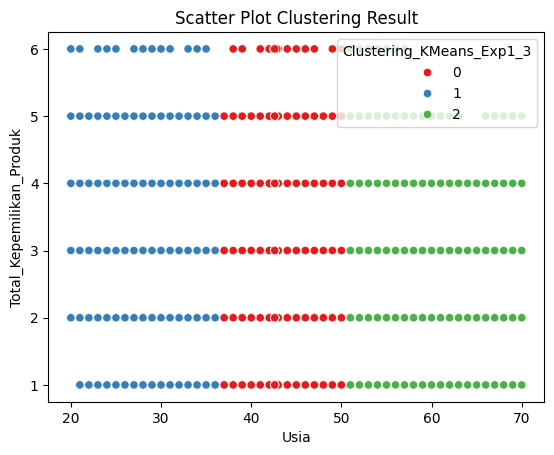

In [39]:
sns.scatterplot(data=df_tele, x='Usia', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
plt.title('Scatter Plot Clustering Result')
plt.show()

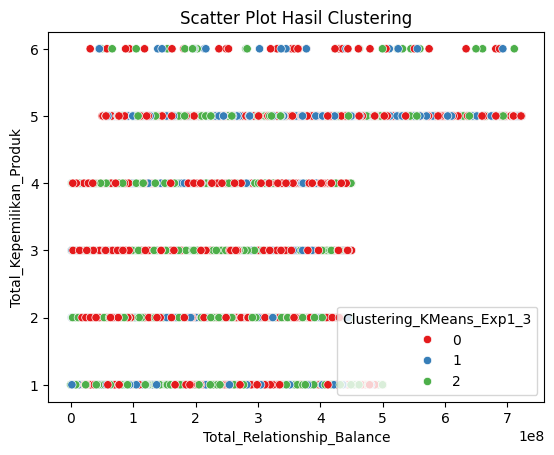

In [40]:
    sns.scatterplot(data=df_tele, x='Total_Relationship_Balance', y='Total_Kepemilikan_Produk', hue='Clustering_KMeans_Exp1_3', palette='Set1')
    plt.title('Scatter Plot Hasil Clustering')
    plt.show()

Mengapa 3? Ini dikarenakan kita memilih cluster hue = 3. Karena KMeans Exp1 lebih bagus ketika memiliki cluster=3.
Kesimpulan:
1. Pada cluster pertama, terlihat jelas untuk area clusternya berdasarkan usia dan total kepemilikan produk, sehingga hal tersebut bisa di identifikasi dan di pelajari sehingga mendapatkan insight.
2. Pada cluster kedua, tidak terlihat jelas pengclusterannya alias tumpang tindih. Hal ini memungkinkan adanya variabel lain yang lebih relevan atau lebih cocok dibandingkan kedua variabel pembanding tersebut.

In [44]:
df_tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10088 entries, 0 to 10087
Data columns (total 49 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        10088 non-null  object 
 1   Vintage                     10088 non-null  object 
 2   Usia                        10088 non-null  float64
 3   Jenis_Kelamin               10088 non-null  object 
 4   Status_Perkawinan           10088 non-null  object 
 5   Jumlah_Anak                 10088 non-null  int64  
 6   Pendidikan                  10088 non-null  object 
 7   Produk_Tabungan             10088 non-null  int64  
 8   Produk_Deposito             10088 non-null  int64  
 9   Produk_Kartu_Kredit         10088 non-null  int64  
 10  Produk_Kredit_Rumah         10088 non-null  int64  
 11  Produk_Kredit_Kendaraan     10088 non-null  int64  
 12  Produk_Kredit_Dana_Tunai    10088 non-null  int64  
 13  Total_Kepemilikan_Produk    100

In [50]:
df_tele.columns

Index(['Area', 'Vintage', 'Usia', 'Jenis_Kelamin', 'Status_Perkawinan',
       'Jumlah_Anak', 'Pendidikan', 'Produk_Tabungan', 'Produk_Deposito',
       'Produk_Kartu_Kredit', 'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance',
       'Clustering_KMeans_Exp0_2', 'Clustering_KMeans_Exp0_3',
       'Clustering_KMeans_Exp0_4', 'Clustering_KMeans_Exp0_5',
       'Clustering_KMeans_Exp0_6', 'Clustering_KMeans_Exp0_7',
       'Clustering_KMeans_Exp1_2', 'Clustering_KMeans_Exp1_3',
       'Clustering_KMeans_Exp1_4', 'Clustering_KMeans_Exp1_5',
       'Clustering_KMeans_Exp1_6', 'Clustering_KMeans_Exp1_7',
       'Clustering_KMeans_Exp2_2', 'Clustering_KMeans_Exp2_3',
       'Clustering_KMeans_Exp2_4', 'Clustering_KMeans_Exp2_5',
       'Clustering_KMeans_Exp2_6', 'Clustering_KMeans_Exp2_7',
       'Clustering_KMedoids_Exp0_2', 'Clustering_KMedoids_Exp0_3',
       'Clustering

In [54]:
numerical_data = df_tele[['Usia', 'Jumlah_Anak','Produk_Tabungan', 'Produk_Deposito',
       'Produk_Kartu_Kredit', 'Produk_Kredit_Rumah', 'Produk_Kredit_Kendaraan',
       'Produk_Kredit_Dana_Tunai', 'Total_Kepemilikan_Produk',
       'Pendapatan_Tahunan', 'Total_Relationship_Balance','Clustering_KMeans_Exp1_3']]

In [55]:
cluster = numerical_data.groupby('Clustering_KMeans_Exp1_3').mean()
cluster

,Usia,Jumlah_Anak,Produk_Tabungan,Produk_Deposito,Produk_Kartu_Kredit,Produk_Kredit_Rumah,Produk_Kredit_Kendaraan,Produk_Kredit_Dana_Tunai,Total_Kepemilikan_Produk,Pendapatan_Tahunan,Total_Relationship_Balance
Clustering_KMeans_Exp1_3,,,,,,,,,,,
0,43.513559,1.261647,0.996235,0.606824,0.331529,0.564235,0.156471,0.474118,3.129412,383.971294,2.387188e+08
1,29.156695,1.204495,1.000000,0.591959,0.307059,0.592909,0.156695,0.604305,3.252928,308.781576,2.442857e+08
2,57.341172,1.465472,0.713326,0.600971,0.340426,0.608063,0.169093,0.540500,2.972378,551.562150,2.375921e+08


Semakin muda customer, mempunyai kemungkinan lebih besar memiliki produk_tabungan, semakin kecil memiliki produk kartu kredit, semakin banyak memiliki total kepemilikan produk, dan memunyai total relation ship balance yang besar.

In [57]:
df_tele[df_tele['Clustering_KMeans_Exp1_3']==0][['Area', 'Vintage', 'Pendidikan', 'Jenis_Kelamin']].value_counts(normalize=True)

Area      Vintage      Pendidikan            Jenis_Kelamin
Jakarta   2 - 3 Tahun  Sarjana               Laki-laki        0.045176
          < 1 Tahun    Sarjana               Laki-laki        0.035294
          2 - 3 Tahun  SMA                   Laki-laki        0.031765
                       SD                    Laki-laki        0.029412
          < 1 Tahun    SMA                   Laki-laki        0.021412
                                                                ...   
Bogor     2 - 3 Tahun  Magister              Perempuan        0.000235
          > 4 Tahun    Sarjana               Perempuan        0.000235
          2 - 3 Tahun  Doktor                Perempuan        0.000235
Solo      > 4 Tahun    SD                    Perempuan        0.000235
Surabaya  > 4 Tahun    Tidak Sekolah Formal  Perempuan        0.000235
Name: proportion, Length: 241, dtype: float64

Untuk group 0, proporsi customer terbesar ada di Area Jakarta, dengan Vintage 2-3 Tahun, Pendidikan Sarjana, Laki-Laki.

In [58]:
df_tele[df_tele['Clustering_KMeans_Exp1_3']==1][['Area', 'Vintage', 'Pendidikan', 'Jenis_Kelamin']].value_counts(normalize=True)

Area     Vintage      Pendidikan            Jenis_Kelamin
Jakarta  2 - 3 Tahun  Sarjana               Laki-laki        0.044951
                      SMA                   Laki-laki        0.029123
                      SD                    Laki-laki        0.028490
                      Sarjana               Perempuan        0.023425
         < 1 Tahun    Sarjana               Laki-laki        0.021526
                                                               ...   
Jogja    > 4 Tahun    Magister              Perempuan        0.000317
                      Tidak Sekolah Formal  Perempuan        0.000317
Solo     > 4 Tahun    Tidak Sekolah Formal  Perempuan        0.000317
                      Doktor                Perempuan        0.000317
Jogja    2 - 3 Tahun  Magister              Perempuan        0.000317
Name: proportion, Length: 242, dtype: float64

Untuk group 1, proporsi customer terbesar ada di Area Jakarta, dengan Vintage 2-3 Tahun, Pendidikan Sarjana, Laki-Laki.
Untuk pendidikan, vintage terbesar (2-3 tahun) memiliki urutan terbesar yaitu -> Sarjana Laki-laki, SMA, SD, dan Sarjana Perempuan

In [60]:
df_tele[df_tele['Clustering_KMeans_Exp1_3']==2][['Area', 'Vintage', 'Pendidikan', 'Jenis_Kelamin']].value_counts(normalize=True)

Area     Vintage      Pendidikan            Jenis_Kelamin
Jakarta  2 - 3 Tahun  Sarjana               Laki-laki        0.042180
                      SD                    Laki-laki        0.031728
         < 1 Tahun    Sarjana               Laki-laki        0.026876
         2 - 3 Tahun  SMA                   Laki-laki        0.026876
                      Sarjana               Perempuan        0.025383
                                                               ...   
Bogor    < 1 Tahun    Tidak Sekolah Formal  Laki-laki        0.000373
                      Sarjana               Perempuan        0.000373
                      SMP                   Laki-laki        0.000373
                      SD                    Perempuan        0.000373
         > 4 Tahun    Doktor                Perempuan        0.000373
Name: proportion, Length: 235, dtype: float64

Untuk group 2, proporsi customer terbesar ada di Area Jakarta, dengan Vintage 2-3 Tahun, Pendidikan Sarjana, Laki-Laki. Untuk pendidikan, vintage terbesar (2-3 tahun) memiliki 2 urutan, yaitu Sarjana (Laki-Laki) dan SD (Laki-Laki)

## Catatan

** digunakan untuk membongkar dict tersebut ke dalam .agg()